
# Sonkhe Shongwe

## **Project Name:** Unemployment Analysis With Python
### Author : Sonkhe Phumelelo shongwe

<img src="Unemployement-in-India.png" alt="Unemployment in India" width="70%"/>

# Introduction

**Project Overview:**

- The COVID-19 pandemic has significantly impacted global employment, leading to widespread job losses and altered working patterns. This project focuses on analyzing employment trends in India, amidst these disruptions, to understand how different regions and sectors have been affected. By examining employment rates across urban and rural areas and assessing changes before and during the pandemic, the study aims to uncover the pandemic's nuanced effects on the Indian labor market.

**Project Objectives:**
1. **Analyze Employment Trends:** Examine changes in employment rates across India, highlighting differences between urban and rural areas to identify the most impacted regions.

2. **Evaluate COVID-19 Impact:** Assess the pandemic's effect on employment patterns by comparing data from pre-pandemic and pandemic periods.

3. **Understand Labor Force Participation:** Investigate how the economic downturn has affected labor market participation, focusing on shifts during the pandemic.

4. **Statistical Analysis:** Use statistical methods to explore employment rate differences and correlations between labor participation and unemployment rates.

5. **Inform Policy Recommendations:** Provide insights to help policymakers and stakeholders develop strategies for economic recovery and support affected workers.


## Table of Contents

- [1. Importing Packages](#one)
- [2. Loading Data](#two)
- [3. Dataset Overview](#three)
- [4. Data Preprocessing](#four)
- [5. Exploratory Data Analysis (EDA)](#five)
- [6. Statistical Analysis](#six)
- [7. Discussion and Interpretation](#seven)
- [8. Conclusion](#eight)


<a id="one"></a>
# 1. Importing Packages 📦
[Back to Table of Contents](#cont)

---

🌟 **Description: Importing Packages** 🌟

The foundation of our analysis begins with importing the following Python packages:

In [1]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import necessary libraries for statistical analysis
import pandas as pd
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import pearsonr
import calendar

# Set the background style
sns.set(style="darkgrid")

<a id="two"></a>
# 2. Loading Data 💾
[Back to Table of Contents](#cont)

---

🌟 **Description: Loading Data** 🌟

Dataset Details:

The dataset provides insights into the unemployment scenario across different Indian states:

- **States:** The states within India.
- **Date:** The date when the unemployment rate was recorded.
- **Measuring Frequency:** The frequency at which measurements were taken (Monthly).
- **Estimated Unemployment Rate (%):** The percentage of individuals unemployed in each state of India.
- **Estimated Employed Individuals:** The count of people currently employed.
- **Estimated Labour Participation Rate (%):** The proportion of the working population (age group: 16-64 years) participating in the labor force, either employed or actively seeking employment.


In [2]:
# Load the data
df_India = pd.read_csv("Unemployment in India.csv")

In [3]:
# Check datafram column names
df_India.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [4]:
# Remove leading or trailing whitespaces from column names
df_India.columns = [col.strip() for col in df_India.columns]

# Print the updated column names
print("Updated Column Names:")
print(df_India.columns)

Updated Column Names:
Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


<a id="three"></a>

# 3. Dataset Overview 📋
[Back to Table of Contents](#cont)

---

🌟 **Description: Dataset Overview** 🌟

This section provides an overview of the dataset, including its structure, key statistics, and any relevant information necessary for understanding the data. It serves as a starting point for exploring the dataset and gaining insights into its contents.



In [5]:
# Check first few rows of dataframe
df_India.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762,44.68,Rural


In [6]:
# Check Dataframe number of rows and columns
df_India.shape

(740, 7)

- `Unemployment in India` data has **768** rows & **3** columns

In [7]:
df_India.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    int64  
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 40.6+ KB


### Analysis of `df_India` DataFrame:

**Categorical Columns:**

- `Region`: Object (string) type.
- `Date`: Object (string) type.
- `Frequency`: Object (string) type.
- `Area`: Object (string) type.

**Numerical Columns:**

- `Estimated Unemployment Rate (%)`: Float64 type.
- `Estimated Employed`: Float64 type.
- `Estimated Labour Participation Rate (%)`: Float64 type.

**Null Data:**
- There are missing values in the `Region`, `Date`, `Frequency`, `Estimated Unemployment Rate (%)`, `Estimated Employed`, `Estimated Labour Participation Rate (%)`, and `Area` columns.



In [8]:
# Check for missing values in the DataFrame
df_India.isnull().sum()

Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
dtype: int64

- `df_India` has **196** null values.

In [9]:
# Check for duplicates in the entire DataFrame
duplicates = df_India.duplicated()

# Count the number of duplicates
num_duplicates = duplicates.sum()

if num_duplicates > 0:
    print("Duplicates found in the DataFrame.")
    # Optionally, you can display the duplicated rows
    duplicate_rows = df_India[duplicates]
    print("Duplicate rows: There are duplicated rows")
else:
    print("No duplicates found in the DataFrame.")


No duplicates found in the DataFrame.


In [10]:
# Drop rows with any missing values
df_India.dropna(inplace=True)

In [11]:
df_India.shape

(740, 7)

<a id="four"></a>
# 4. Data Preprocessing 🛠️
[Back to Table of Contents](#cont)

---

🌟 **Description: Data Preprocessing** 🌟

This section involves cleaning and preparing the data for analysis. We'll handle missing values, perform feature engineering, and any necessary transformations to ensure our data is ready for exploration.


## 4.1 Date Column

- This step involves processing the `Date` column to convert it to **datetime** format and extract `year`, `month`, and `month number` components. It ensures that the **date** information is properly formatted and broken down into separate components for further analysis.


In [12]:
# Remove leading spaces from ' Date' column and convert to datetime format
df_India['Date'] = pd.to_datetime(df_India['Date'].str.strip(), format='%d-%m-%Y')

In [13]:
# Extract year, month, and day components
df_India['Year'] = df_India['Date'].dt.year
df_India['Month'] = df_India['Date'].dt.month.apply(lambda x: calendar.month_abbr[x])
df_India['Month_Num'] = df_India['Date'].dt.month

# Display the DataFrame with new columns
df_India[['Date', 'Year', 'Month', 'Month_Num']].head()


,Date,Year,Month,Month_Num
0,2019-05-31,2019,May,5
1,2019-06-30,2019,Jun,6
2,2019-07-31,2019,Jul,7
3,2019-08-31,2019,Aug,8
4,2019-09-30,2019,Sep,9


## 4.2 Frequency Column

- This step involves checking unique values in the `Frequency` column, removing leading or trailing whitespaces, and converting it to categorical data type. It standardizes the representation of frequency information for better analysis.


In [14]:
# Check unique values in the 'Frequency' column
unique_freq_values = df_India['Frequency'].unique()
print("Unique values in the 'Frequency' column:")
print(unique_freq_values)


Unique values in the 'Frequency' column:
[' Monthly' 'Monthly']


In [15]:
# Remove leading or trailing whitespaces from the ' Frequency' column
df_India['Frequency'] = df_India['Frequency'].str.strip()

# Convert the ' Frequency' column to categorical data type
df_India['Frequency'] = df_India['Frequency'].astype('category')

# Check the data type and unique values in the ' Frequency' column after conversion
print("Data type of ' Frequency' column:", df_India['Frequency'].dtype)
print("Unique values in the ' Frequency' column:")
print(df_India['Frequency'].cat.categories)


Data type of ' Frequency' column: category
Unique values in the ' Frequency' column:
Index(['Monthly'], dtype='object')


## 4.3 Area Column

- This step involves checking unique values of the `Area` column and converting it to categorical type. It standardizes the representation of area information, making it easier to categorize and analyze data based on geographical regions.

In [16]:
# Check unique values of the 'Area' column
unique_areas = df_India['Area'].unique()

# Display unique values
print("Unique Values of Area:")
print(unique_areas)


Unique Values of Area:
['Rural' 'Urban']


In [17]:
# Convert 'Area' column to categorical type
df_India['Area'] = df_India['Area'].astype('category')

# Verify the data type conversion
print(df_India['Area'].dtype)


category


<a id="five"></a>
# 5. Exploratory Data Analysis (EDA) 🔍
[Back to Table of Contents](#cont)

---

🌟 **Description: Exploratory Data Analysis (EDA)** 🌟

Here, we dive deeper into the dataset, exploring its characteristics and relationships through visualizations and statistical summaries. This step helps us gain insights into the data and identify patterns or trends.


In [18]:
# Reorder columns
df_India = df_India[['Region', 'Date', 'Year', 'Month', 'Month_Num', 'Frequency',
                     'Estimated Unemployment Rate (%)', 'Estimated Employed',
                     'Estimated Labour Participation Rate (%)', 'Area']]

In [19]:
df_India.head()

,Region,Date,Year,Month,Month_Num,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,2019-05-31,2019,May,5,Monthly,3.65,11999139,43.24,Rural
1,Andhra Pradesh,2019-06-30,2019,Jun,6,Monthly,3.05,11755881,42.05,Rural
2,Andhra Pradesh,2019-07-31,2019,Jul,7,Monthly,3.75,12086707,43.50,Rural
3,Andhra Pradesh,2019-08-31,2019,Aug,8,Monthly,3.32,12285693,43.97,Rural
4,Andhra Pradesh,2019-09-30,2019,Sep,9,Monthly,5.17,12256762,44.68,Rural


In [20]:
df_India.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   740 non-null    object        
 1   Date                                     740 non-null    datetime64[ns]
 2   Year                                     740 non-null    int32         
 3   Month                                    740 non-null    object        
 4   Month_Num                                740 non-null    int32         
 5   Frequency                                740 non-null    category      
 6   Estimated Unemployment Rate (%)          740 non-null    float64       
 7   Estimated Employed                       740 non-null    int64         
 8   Estimated Labour Participation Rate (%)  740 non-null    float64       
 9   Area                                     74

## 5.1 Average Unemployemnt Rate By Region

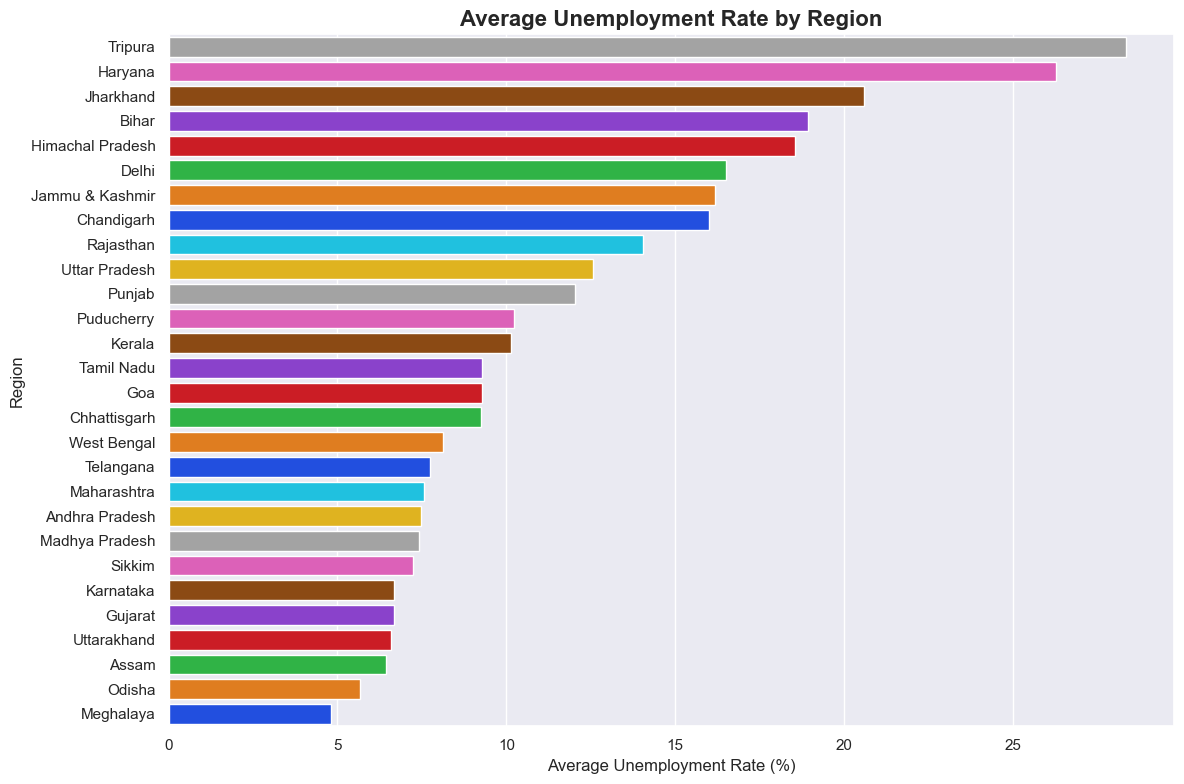

In [21]:
# Calculate the average unemployment rate per region
avg_unemployment_by_region = df_India.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values()

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_unemployment_by_region.values, hue=avg_unemployment_by_region.index, y=avg_unemployment_by_region.index, palette='bright')
plt.xlabel('Average Unemployment Rate (%)')
plt.ylabel('Region')
plt.title('Average Unemployment Rate by Region', fontweight ='bold',fontsize = 16)
plt.gca().invert_yaxis()   # Invert the y-axis

# Improve layout for readability
plt.tight_layout()

plt.show()  # Corrected plt.show() function call


- **Regional Variation:** The plot shows distinct variations in unemployment rates across different regions in India, reflecting economic diversity.

- **High Unemployment:** Regions with higher bars likely signify higher unemployment rates, possibly indicating a more severe impact of the COVID-19 pandemic.

- **Low Unemployment:** Conversely, regions with lower bars suggest lower unemployment rates. This could be attributed to a more resilient economic structure or effective job retention policies. Alternatively, a larger agricultural base in these regions might have been less affected by lockdowns.

## 5.2 Unemployment rate over time

In [22]:
# Group the data by Year and Month, then calculate the mean unemployment rate for each group
monthly_avg_unemployment = df_India.groupby(['Year', 'Month'])['Estimated Unemployment Rate (%)'].mean().reset_index()

# Correctly combine 'Year' and 'Month' into a datetime format
monthly_avg_unemployment['Month-Year'] = pd.to_datetime(monthly_avg_unemployment['Year'].astype(str) + '-' + monthly_avg_unemployment['Month'], format='%Y-%b')

# Ensure the data is sorted by the new 'Month-Year' datetime column
monthly_avg_unemployment = monthly_avg_unemployment.sort_values(by='Month-Year')

# Format the 'Month-Year' column as 'Month-Year' (e.g., 'May-2019')
monthly_avg_unemployment['Month-Year'] = monthly_avg_unemployment['Month-Year'].dt.strftime('%b-%Y')

In [23]:
monthly_avg_unemployment

,Year,Month,Estimated Unemployment Rate (%),Month-Year
4,2019,May,8.874259,May-2019
3,2019,Jun,9.303333,Jun-2019
2,2019,Jul,9.033889,Jul-2019
0,2019,Aug,9.637925,Aug-2019
7,2019,Sep,9.051731,Sep-2019
6,2019,Oct,9.900909,Oct-2019
5,2019,Nov,9.868364,Nov-2019
1,2019,Dec,9.497358,Dec-2019
10,2020,Jan,9.950755,Jan-2020
9,2020,Feb,9.964717,Feb-2020


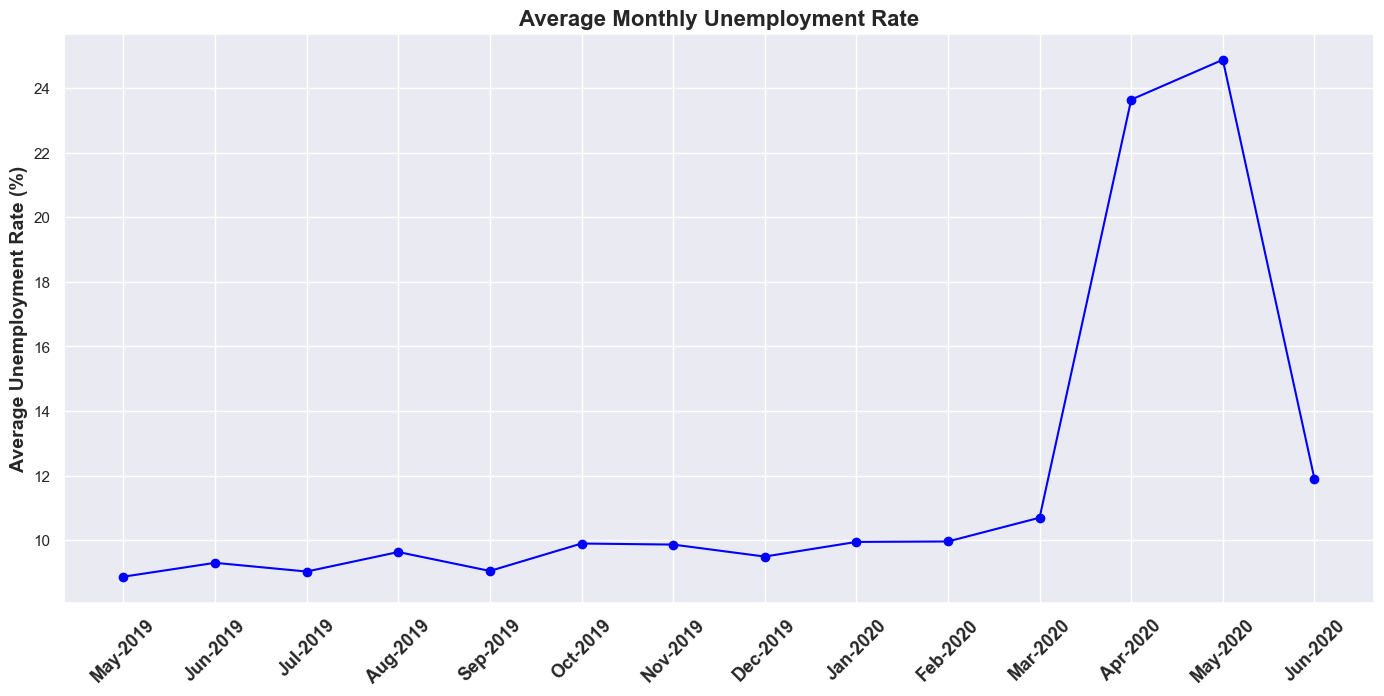

In [43]:
# Plotting
plt.figure(figsize=(14, 7))
plt.plot(monthly_avg_unemployment['Month-Year'], monthly_avg_unemployment['Estimated Unemployment Rate (%)'], marker='o', linestyle='-', color='blue')
plt.title('Average Monthly Unemployment Rate', fontweight='bold', fontsize=16)
plt.ylabel('Average Unemployment Rate (%)',fontweight = 'bold',fontsize = 14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to make room for the rotated x-axis labels
plt.tight_layout()

# Make x-axis dates bold and increase their fontsize
plt.xticks(fontsize=13, fontweight='bold')
plt.show()


- **Pre-Lockdown Stability:** The plot reveals a stable unemployment rate leading up to March 2020, suggesting a steady job market prior to the pandemic-induced lockdowns.

- **Lockdown Impact:** There is a significant spike in unemployment in March 2020, corresponding with the onset of official COVID-19 lockdown measures, reflecting the immediate effect of business closures and economic disruption.

- **Unemployment Peak:** The peak in April 2020 represents the zenith of the unemployment crisis, likely due to the full impact of stringent lockdowns and a halt in various economic activities.

- **Rapid Recovery:** The sharp decline in unemployment rates from May 2020 to June 2020 indicates a swift recovery phase, potentially due to the easing of restrictions, businesses adapting to new operational methods, and governmental support to mitigate the economic fallout.

These points encapsulate the key trends in the average monthly unemployment rate in India during the crucial initial months of the COVID-19 pandemic, reflecting the immediate effects of lockdowns and the subsequent recovery period.

## 5.3 Average Monthly Labour Pariticipation rate

In [25]:
# Calculate the average labor participation rate per month
monthly_avg_labor_participation = df_India.groupby(['Year', 'Month'])['Estimated Labour Participation Rate (%)'].mean().reset_index()

# Combine 'Month' and 'Year' columns into a new column 'Month-Year' for plotting
monthly_avg_labor_participation['Month-Year'] = monthly_avg_labor_participation['Month'] + '-' + monthly_avg_labor_participation['Year'].astype(str)

# Sort the DataFrame by the 'Month-Year' column
monthly_avg_labor_participation['Date'] = pd.to_datetime(monthly_avg_labor_participation['Month-Year'], format='%b-%Y')
monthly_avg_labor_participation = monthly_avg_labor_participation.sort_values(by='Date')

In [26]:
monthly_avg_labor_participation

,Year,Month,Estimated Labour Participation Rate (%),Month-Year,Date
4,2019,May,43.902963,May-2019,2019-05-01
3,2019,Jun,43.750556,Jun-2019,2019-06-01
2,2019,Jul,43.706667,Jul-2019,2019-07-01
0,2019,Aug,43.646792,Aug-2019,2019-08-01
7,2019,Sep,44.301346,Sep-2019,2019-09-01
6,2019,Oct,44.001273,Oct-2019,2019-10-01
5,2019,Nov,44.110545,Nov-2019,2019-11-01
1,2019,Dec,43.667358,Dec-2019,2019-12-01
10,2020,Jan,44.051321,Jan-2020,2020-01-01
9,2020,Feb,43.723019,Feb-2020,2020-02-01


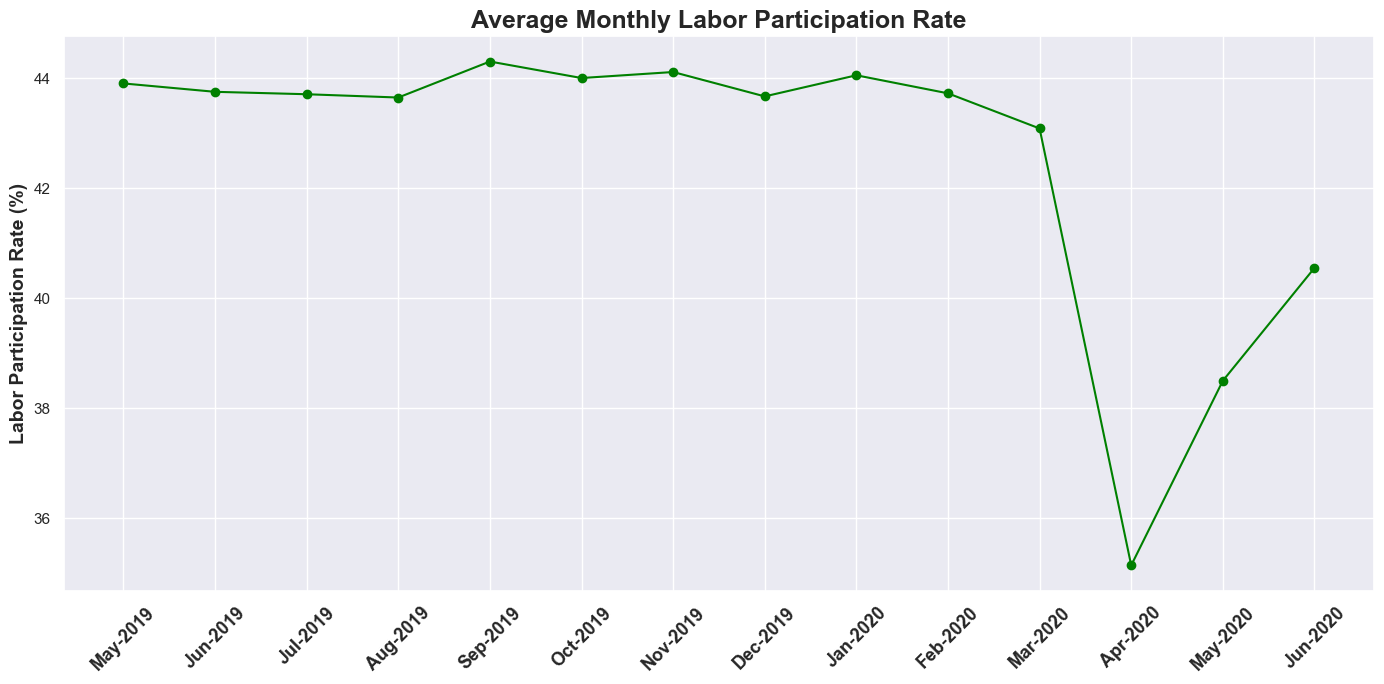

In [42]:
# Plotting
plt.figure(figsize=(14, 7))
plt.plot(monthly_avg_labor_participation['Month-Year'], monthly_avg_labor_participation['Estimated Labour Participation Rate (%)'], marker='o', linestyle='-', color='green')
plt.title('Average Monthly Labor Participation Rate', fontweight= 'bold', fontsize =18)
plt.ylabel('Labor Participation Rate (%)', fontsize = 14,fontweight ='bold')
plt.xticks(rotation=45)
# Make x-axis dates bold and increase their fontsize
plt.xticks(fontsize=13, fontweight='bold')
plt.tight_layout()



The provided plot depicting the average monthly labor participation rate indicates several noteworthy trends:

- **Pre-Pandemic Stability:** Before March 2020, the labor participation rate remains relatively high and stable, suggesting a consistent engagement of the eligible population in the labor market.

- **Pandemic-Induced Decline:** There is a pronounced decrease in labor participation from March 2020 to April 2020, which coincides with the imposition of lockdown measures in response to COVID-19. This drastic drop likely reflects the immediate effect of restrictions on people's ability to work or seek employment.

- **Partial Recovery:** From April 2020 to June 2020, there is a noticeable recovery in the labor participation rate. This improvement may be due to the adaptation of businesses to lockdown conditions, the initiation of work-from-home arrangements, or the gradual lifting of certain restrictions, allowing more people to return to work or actively participate in the job market again.

These trends mirror the significant impact that the onset of the pandemic and subsequent lockdowns had on people's capacity and willingness to participate in the labor force, followed by a rebound as economies began to adapt to the new circumstances.

## 5.4 Average number of people employed over time

In [28]:
# Filter the dataset for rural areas
df_rural = df_India[df_India['Area'] == 'Rural']

# Group by Year and Month, then calculate the average estimated employed for rural areas
df_rural_avg_employment = df_rural.groupby(['Year', 'Month'])['Estimated Employed'].mean().reset_index(name='Average Estimated Employed')

# Filter the dataset for urban areas
df_urban = df_India[df_India['Area'] == 'Urban']

# Group by Year and Month, then calculate the average estimated employed for urban areas
df_urban_avg_employment = df_urban.groupby(['Year', 'Month'])['Estimated Employed'].mean().reset_index(name='Average Estimated Employed')



In [29]:
# Combine 'Month' and 'Year' columns into a new column 'Month_Year' for rural data
df_rural_avg_employment['Month_Year'] = df_rural_avg_employment['Month'] + '-' + df_rural_avg_employment['Year'].astype(str)

# Combine 'Month' and 'Year' columns into a new column 'Month_Year' for urban data
df_urban_avg_employment['Month_Year'] = df_urban_avg_employment['Month'] + '-' + df_urban_avg_employment['Year'].astype(str)

# Convert 'Month_Year' column to datetime format
df_rural_avg_employment['Date'] = pd.to_datetime(df_rural_avg_employment['Month_Year'], format='%b-%Y')
df_urban_avg_employment['Date'] = pd.to_datetime(df_urban_avg_employment['Month_Year'], format='%b-%Y')

# Sort rural data by 'Month_Year' column
df_rural_avg_employment = df_rural_avg_employment.sort_values(by='Date')

# Sort urban data by 'Month_Year' column
df_urban_avg_employment = df_urban_avg_employment.sort_values(by='Date')


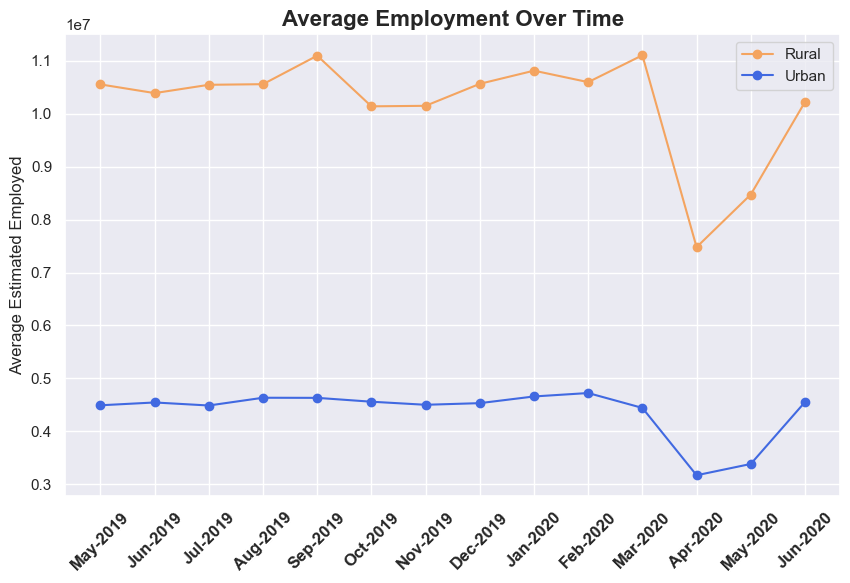

In [30]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_rural_avg_employment['Month_Year'], df_rural_avg_employment['Average Estimated Employed'], marker='o', label='Rural', color='sandybrown')
plt.plot(df_urban_avg_employment['Month_Year'], df_urban_avg_employment['Average Estimated Employed'], marker='o', label='Urban', color='royalblue')
plt.title('Average Employment Over Time', fontweight='bold', fontsize=16)
plt.ylabel('Average Estimated Employed')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(loc='upper right')  # Place legend in the top right corner
plt.grid(True)
# Make x-axis dates bold and increase their fontsize
plt.xticks(fontsize=12, fontweight='bold')

# Show plot
plt.show()


- **Urban Stability:** Employment in Urban areas remains relatively stable, with minor fluctuations. Despite a slight decline in early 2020, employment quickly rebounds, indicating resilience in agricultural sectors.

- **Urban Impact of COVID-19:** Urban employment declines around March 2020 due to COVID-19 measures, but less severely than in rural areas. This suggests urban jobs may be more adaptable or supported by remote work and policies.

- **Rural Fluctuations:** Rural employment sharply drops in April 2020, followed by a rapid recovery by June 2020. This fluctuation may stem from seasonal factors or eased restrictions.

- **Urban Resilience:** Urban employment shows resilience with a less severe decline and gradual recovery, possibly due to a diverse job market or effective mitigation strategies.

Overall, the plot highlights COVID-19's immediate impact on employment, with a disruption in April 2020 followed by recovery. The contrast between rural and urban trends underscores varied effects, emphasizing the need for targeted interventions.

## 5.5 Average Estimated Employment: Rural vs. Urban

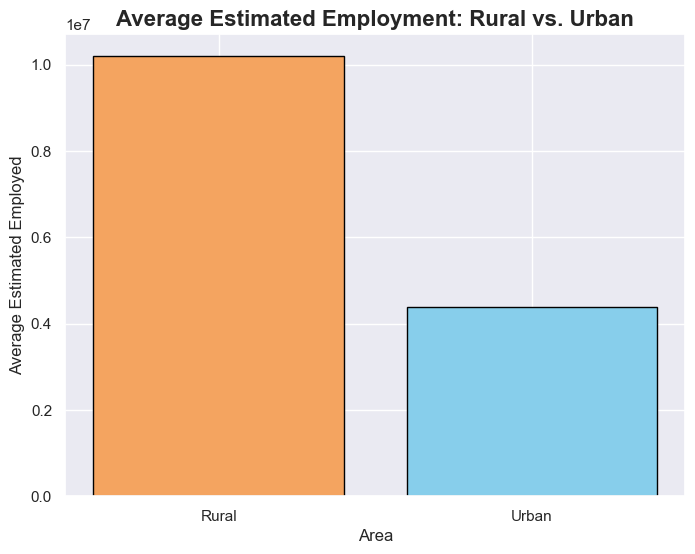

In [38]:
# Calculate the average estimated employed for rural areas
avg_employed_rural = df_India[df_India['Area'] == 'Rural']['Estimated Employed'].mean()

# Calculate the average estimated employed for urban areas
avg_employed_urban = df_India[df_India['Area'] == 'Urban']['Estimated Employed'].mean()

# Prepare data
areas = ['Rural', 'Urban']
avg_employments = [avg_employed_rural, avg_employed_urban]
colors = ['sandybrown', 'skyblue']

# Plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(areas, avg_employments, color=colors, edgecolor='black')  # Add black edge to the bars
plt.title('Average Estimated Employment: Rural vs. Urban', fontweight = 'bold', fontsize = 16)
plt.ylabel('Average Estimated Employed')
plt.xlabel('Area')

# Show plot
plt.show()


The bar chart comparing the average estimated employment between rural and urban areas shows the following insights:

- **Higher Rural Employment:** The taller bar for rural areas indicates a higher average employment count compared to urban areas, likely due to a larger agricultural workforce.

- **Urban Employment Consideration**: While urban employment appears lower, it could be influenced by factors like population density and the nature of urban jobs, which may not require as many workers as rural occupations.

- **Economic Structure Difference:** The contrast between bars underscores variations in economic structures and workforce distributions. Higher rural employment hints at a labor-intensive economy, while urban areas may offer diverse job sectors requiring fewer workers.

This analysis underscores the need to delve deeper into the types of employment and the quality of job opportunities in both rural and urban settings to fully understand the implications of these figures.

<a id="six"></a>
# 6. Statistical Analysis 📊
[Back to Table of Contents](#cont)

---

🌟 **Description: Statistical Analysis** 🌟

In this section, we perform advanced statistical analyses to uncover relationships between variables, test hypotheses, and derive meaningful insights from the data. Statistical techniques such as regression analysis, hypothesis testing, and correlation analysis may be employed.


## 6.1 Descriptive Analysis

In [32]:
# Select only numeric columns
numeric_columns = df_India.select_dtypes(include=['number'])

numeric_columns.describe()

,Year,Month_Num,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,740.000000,740.000000,7.400000e+02,740.000000
mean,2019.418919,6.390541,11.787946,7.204460e+06,42.630122
std,0.493716,3.235070,10.721298,8.087988e+06,8.111094
min,2019.000000,1.000000,0.000000,4.942000e+04,13.330000
25%,2019.000000,4.000000,4.657500,1.190404e+06,38.062500
50%,2019.000000,6.000000,8.350000,4.744178e+06,41.160000
75%,2020.000000,9.000000,15.887500,1.127549e+07,45.505000
max,2020.000000,12.000000,76.740000,4.577751e+07,72.570000


**Estimated Unemployment Rate (%):**
- The average unemployment rate is around **11.79%**. Some instances, like the maximum of **76.74%**, might be outliers.

**Estimated Employed:**
- On average, there are about **7.20** million employed individuals. The range is wide, from a minimum of 49,420 to a maximum of **45.78** million.

**Estimated Labour Participation Rate (%):**
- The average labour participation rate is about **42.63%**. It varies widely, from a low of **13.33%** to a high of **72.57%**.

## 6.2 T-Test for Independent Samples

### **Hypothesis 1: Employment Rate Difference by Area**
- **H0:** There is no significant difference in the average employment rates between rural and urban areas.
- **H1:** There is a significant difference in the average employment rates between rural and urban areas.

In [33]:
# Extract employment rates for rural and urban areas
employment_rural = df_India[df_India['Area'] == 'Rural']['Estimated Employed']
employment_urban = df_India[df_India['Area'] == 'Urban']['Estimated Employed']

# Perform the t-test
t_stat, p_value = stats.ttest_ind(employment_rural, employment_urban)

# Print results
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 10.445935629030835, P-value: 6.4637182398370674e-24


The results of the t-test for Hypothesis 1 provide significant insights into the differences in average employment rates between rural and urban areas:

- **Statistical Significance:** With a p-value of approximately $$6.46 \times 10^{-24}$$
the result is highly statistically significant. This p-value is far below the typical alpha level of 0.05, which indicates strong evidence against the null hypothesis (H0).

- **Rejection of Null Hypothesis:** Given the extremely low p-value, we reject the null hypothesis (H0) that there is no difference in the average employment rates between rural and urban areas.


### **Hypothesis 2: Labor Participation Rate and Employment Rate Correlation**
To explore the relationship between labor force participation and employment rates.

- **H0:** There is no correlation between the labor participation rate and the employment rate.
- **H1:** There is a correlation between the labor participation rate and the employment rate.

In [34]:
# Assuming your DataFrame df_India has 'Estimated Labour Participation Rate (%)' and 'Estimated Employed' columns
labour_participation_rate = df_India['Estimated Labour Participation Rate (%)']
employment_rate = df_India['Estimated Employed']

# Calculate the Pearson correlation coefficient
correlation_coefficient, p_value = pearsonr(labour_participation_rate, employment_rate)

print(f"Correlation Coefficient: {correlation_coefficient}, P-value: {p_value}")


Correlation Coefficient: 0.011300255229285872, P-value: 0.7589268618671811


Based on the Pearson correlation coefficient and associated p-value, here are the insights for Hypothesis 2:

- **Statistical Significance:** The p-value of approximately 0.759 exceeds the conventional alpha level of 0.05, indicating a lack of statistical significance in the correlation between labor participation rate and employment rate. This suggests any observed correlation may be due to random chance.

- **Verdict on Hypothesis:** With no statistically significant correlation, we fail to reject the null hypothesis (H0), indicating insufficient evidence to support the alternative hypothesis (H1) suggesting a correlation between labor participation rate and employment rate.

### **Hypothesis 3: Variations in Employment Rates Across Different Regions** (ANOVA Test)

If your dataset includes multiple regions, you might be interested in whether employment rates significantly differ across these regions.

- **H0:** There are no significant differences in the average employment rates across different regions.
- **H1:** There are significant differences in the average employment rates across different regions.

In [35]:
# Dynamically creating a list of employment rates for each region
regions = ['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa', 'Gujarat',
           'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
           'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry',
           'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
           'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'Chandigarh']

# List to hold employment rates for each region
employment_rates = [df_India[df_India['Region'] == region]['Estimated Employed'] for region in regions]

# Perform ANOVA
f_stat, p_value = f_oneway(*employment_rates)

print(f"F-statistic: {f_stat}, P-value: {p_value}")


F-statistic: 58.233727480913856, P-value: 3.2133171991936516e-160


Here are the insights from the ANOVA test for Hypothesis 3:

- **Statistical Significance:** The obtained F-statistic value of 58.23 and a very low p-value of $$3.21 \times 10^{-160}$$ indicate that there are significant differences in the average employment rates across different regions.

- **Rejecting the Null Hypothesis:** With such a low p-value, we reject the null hypothesis (H0) that there are no significant differences in the average employment rates across regions. This suggests that there are indeed significant variations in employment rates among the regions analyzed.


## 6.3 Correlation Analysis (Pearson)
Pearson correlation measures the linear relationship between two continuous variables. It quantifies the degree to which pairs of variables change together, ranging from -1 to 1, where:

- 1 indicates a perfect positive linear relationship,
- 0 indicates no linear relationship, and
- -1 indicates a perfect negative linear relationship.

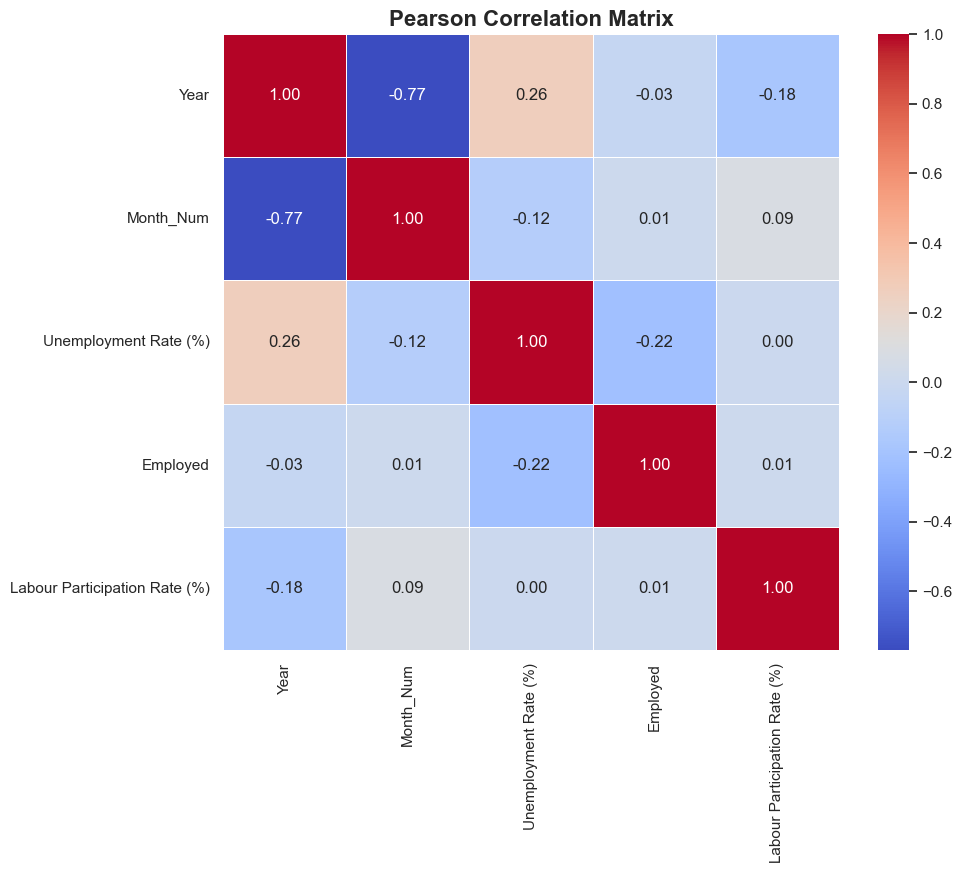

In [36]:
# Create a copy of the DataFrame
df_temp = df_India.copy()

# Remove the word "Estimated" from column names that contain it in the copy
df_temp.columns = [col.replace('Estimated ', '') if 'Estimated ' in col else col for col in df_temp.columns]

# Calculate the Pearson correlation matrix using the modified column names
corr_matrix = df_temp.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, linewidths=0.5)

plt.title('Pearson Correlation Matrix',fontweight ='bold',fontsize = 16)

# Show plot
plt.show()

- **Inversed Relationship in Time Variables:** The dataset shows an inversed relationship between time-related variables, indicating that the categorization or encoding of these variables is influencing their correlation, which could be an artifact of how the data was structured.

- **Independent Employment Dynamics:** Employment metrics, such as the unemployment rate and labor participation rate, display low correlation with each other, suggesting that each metric is influenced by distinct factors and may not have a direct linear relationship over the given period.

<a id="seven"></a>
# 7. Discussion and Interpretation 💬
[Back to Table of Contents](#cont)

---
🌟 **Description: Discussion and Interpretation** 🌟

In this section, we unpack the results of our statistical analysis and examine their implications. Our findings suggest significant differences in employment rates across rural and urban areas, as well as among various regions within India.

### **Interpretation of Statistical Tests**
- The t-tests revealed a significant difference in employment rates between rural and urban areas, with rural areas showing higher employment on average. This may reflect the rural economy's reliance on agriculture, which could be less susceptible to the immediate impacts of lockdowns compared to the urban service and manufacturing sectors.
- The Pearson correlation analysis showed that the relationship between labor participation rates and employment rates was not statistically significant, indicating that the two may not be directly proportional, or other factors may be influencing the employment rates.
- Our ANOVA test indicated significant differences in employment rates across regions. This variability might be due to the distinct economic structures, industrial diversity, and varying levels of government intervention in response to the pandemic across states.

### **Broader Economic Implications**
- These results are critical in the backdrop of COVID-19, which has underscored the vulnerability of employment sectors to global disruptions. They imply a need for targeted policy interventions to bolster employment in regions and sectors most affected by the pandemic.

### **Limitations and Further Research**
- One limitation of our analysis is that it does not account for informal employment, which is a significant part of India's economy. Future research could aim to integrate this aspect.
- Additionally, the analysis does not capture the quality of employment or job security, which are crucial for understanding the long-term impact of the pandemic on the workforce.

### **Policy Recommendations**
- Policies aimed at diversifying the economic base in urban areas could mitigate the risk of future disruptions.
- Rural employment may benefit from the formalization of jobs and increased investment in agro-industrial activities.

### **Next Steps**
- Future studies should explore the long-term effects of the pandemic on the job market and the efficacy of employment policies implemented during this period.
- Qualitative research could also provide insights into the lived experiences of workers in both rural and urban settings during the pandemic.

### **Concluding Remarks**
- The resilience of India's labor market to the COVID-19 pandemic presents both challenges and opportunities for policymakers.
- It is imperative to continue monitoring employment trends to inform ongoing and future responses to global economic shocks.

<a id="eight"></a>
# 8. Conclusion 🏁
[Back to Table of Contents](#cont)

---

As we conclude our analysis, we reflect on the significant insights gleaned from our investigation into employment trends across rural and urban areas of India during the COVID-19 pandemic.

### **Summary of Findings**
- Our analysis indicated that rural areas have a significantly higher average employment rate compared to urban areas, possibly due to the nature of the rural economy.
- The lack of a significant correlation between labor participation rates and employment rates suggests that the labor market dynamics during the pandemic were influenced by multiple factors.
- Regional disparities in employment rates point to the uneven impact of the pandemic across different states and underscore the importance of localized policy responses.

### **Significance of the Study**
- This study provides valuable insights into the complexities of the labor market during an unprecedented global crisis.
- The findings highlight the resilience of rural employment, the vulnerability of urban employment sectors, and the critical role of regional economic policies during the pandemic.

### **Recommendations for Policy and Practice**
- To strengthen urban employment, investment in diverse and resilient sectors, such as technology and remote-capable services, is recommended.
- Rural employment could be further supported through infrastructure development and the formalization of the agricultural sector.
- Policymakers should consider the unique economic makeup of each region when designing employment policies, especially in response to global crises.

### **Future Directions**
- There is a need for continued research to understand the long-term impacts of the pandemic on employment, particularly as the world transitions into a post-pandemic economy.
- Future studies could also explore the relationship between employment trends and other socio-economic factors such as education, health, and migration patterns.

### **Closing Thoughts**
- In the face of adversity, understanding employment trends is more than an academic pursuit; it is a crucial element in building resilient economies and societies.
- By shedding light on the employment challenges and opportunities during the COVID-19 pandemic, this study aims to contribute to a more informed approach to economic recovery and growth.


<img src="https://tenor.com/en-GB/view/lisk-the-end-gif-10529426.gif" width="70%" height="40%">
